In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/z7/jmcsyl9x47zdw6n1xd2_16jh0000gn/T/ipykernel_33669/555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv('../../data/combined/combined_industry14_mean.csv')

In [3]:
google = data.copy()
# for google 
google.drop(columns=['Unnamed: 0', 'industry_group', 'ghg_change_real_cat_next'], inplace=True)

In [4]:
google['split'] = 0


# if data[data['year'] < 2021] set split to TRAIN
google.loc[google['year'] < 2021, 'split'] = 'TRAIN'
# if data[data['year'] == 2021] set split to TEST
google.loc[google['year'] == 2021, 'split'] = 'TEST'
# if data[data['year'] == 2021] set split to VALIDATION
google.loc[google['year'] == 2020, 'split'] = 'VALIDATION'

/var/folders/z7/jmcsyl9x47zdw6n1xd2_16jh0000gn/T/ipykernel_33669/2990776640.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'TRAIN' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  google.loc[google['year'] < 2021, 'split'] = 'TRAIN'


In [5]:
google.to_csv('../../data/combined/combined_industry14_mean_google.csv')

In [6]:
industry = data['industry_group']

In [7]:
data[['year', 'ghg_change_real']]

,year,ghg_change_real
0,2011.0,-2.941957
1,2012.0,-3.509796
2,2013.0,-3.451964
3,2014.0,-3.469455
4,2015.0,-3.223750
...,...,...
132,2013.0,-3.052319
133,2014.0,-2.768652
134,2015.0,-3.877006
135,2016.0,-3.738756


In [8]:
data.shape

(137, 130)

In [9]:
data.tail(20)

,year,Unnamed: 0,proportion_verified_scope1,proportion_verified_scope2,ghg_verification_scope1_no data,ghg_verification_scope1_yes,ghg_verification_scope2_no data,ghg_verification_scope2_yes,ghg_verification_scope3_no data,ghg_verification_scope3_yes,...,co2_total_log1p_missing,msaving_total_log1p_missing,investment_total_log1p_missing,absent_cdp_initiative_firm_year_processed.csv,cdp_risk_transition,cdp_risk_physical,cdp_aggregated_opp,absent_cdp_riskopp_processed.csv,number_of_firms,industry_group
117,2020.0,12674.738806,92.789179,97.014925,0.014925,0.725746,0.011194,0.731343,0.070896,0.621269,...,0.0,0.0,0.0,0.132463,0.076493,0.001866,0.875000,0.0,536,industry14_Services
118,2021.0,13400.048359,93.200345,96.718480,0.025907,0.734024,0.013817,0.739206,0.060449,0.663212,...,0.0,0.0,0.0,0.131261,0.070812,0.001727,0.867012,0.0,579,industry14_Services
119,2011.0,8588.166667,96.666667,96.666667,0.000000,0.633333,0.000000,0.566667,0.300000,0.133333,...,0.0,0.0,0.0,0.033333,0.933333,0.833333,0.900000,0.0,30,industry14_Transportation services
120,2012.0,9784.292683,100.000000,100.000000,0.000000,0.804878,0.024390,0.707317,0.268293,0.341463,...,0.0,0.0,0.0,0.097561,0.926829,0.878049,0.853659,0.0,41,industry14_Transportation services
121,2013.0,11136.777778,97.777778,97.777778,0.022222,0.711111,0.044444,0.600000,0.155556,0.400000,...,0.0,0.0,0.0,0.066667,0.933333,0.844444,0.844444,0.0,45,industry14_Transportation services
122,2014.0,10122.276596,84.851064,87.659574,0.000000,0.808511,0.021277,0.744681,0.106383,0.468085,...,0.0,0.0,0.0,0.021277,0.936170,0.893617,0.914894,0.0,47,industry14_Transportation services
123,2015.0,10806.346939,91.693878,98.448980,0.020408,0.775510,0.020408,0.775510,0.081633,0.469388,...,0.0,0.0,0.0,0.040816,0.938776,0.897959,0.918367,0.0,49,industry14_Transportation services
124,2016.0,10628.173077,92.326923,98.076923,0.019231,0.711538,0.038462,0.673077,0.134615,0.480769,...,0.0,0.0,0.0,0.057692,0.923077,0.846154,0.884615,0.0,52,industry14_Transportation services
125,2017.0,10022.472727,89.036364,98.181818,0.018182,0.745455,0.018182,0.727273,0.072727,0.490909,...,0.0,0.0,0.0,0.109091,0.927273,0.854545,0.872727,0.0,55,industry14_Transportation services
126,2018.0,10908.070175,88.649123,98.245614,0.035088,0.719298,0.017544,0.701754,0.175439,0.508772,...,0.0,0.0,0.0,0.035088,0.824561,0.754386,0.859649,0.0,57,industry14_Transportation services


In [10]:
data.drop(columns=['Unnamed: 0', 'industry_group'], inplace=True)

In [11]:
data['industry14_Hospitality'].mean()

0.08029197080291971

**Simple Random Forest**

In [12]:
train_data = data[data['year'] < 2021].drop(columns=['ghg_change_real_cat_next'])
test_data = data[data['year'] == 2021].drop(columns=['ghg_change_real_cat_next'])


X_train = train_data.drop(columns=['ghg_change_real_next', 'ghg_change_real_cat', 'ghg_change_total'])
X_test = test_data.drop(columns=['ghg_change_real_next', 'ghg_change_real_cat', 'ghg_change_total'])
y_train = train_data['ghg_change_real_next']
y_test = test_data['ghg_change_real_next']

In [13]:
test_data

,year,proportion_verified_scope1,proportion_verified_scope2,ghg_verification_scope1_no data,ghg_verification_scope1_yes,ghg_verification_scope2_no data,ghg_verification_scope2_yes,ghg_verification_scope3_no data,ghg_verification_scope3_yes,type_scope1_limited,...,investment_total_log1p,co2_total_log1p_missing,msaving_total_log1p_missing,investment_total_log1p_missing,absent_cdp_initiative_firm_year_processed.csv,cdp_risk_transition,cdp_risk_physical,cdp_aggregated_opp,absent_cdp_riskopp_processed.csv,number_of_firms
10,2021.0,94.794118,99.019608,0.009804,0.715686,0.009804,0.715686,0.137255,0.500000,0.519608,...,9.676401,0.0,0.0,0.0,0.117647,0.039216,0.000000,0.843137,0.0,102
21,2021.0,91.951613,99.193548,0.000000,0.750000,0.032258,0.725806,0.112903,0.532258,0.548387,...,10.489014,0.0,0.0,0.0,0.104839,0.040323,0.000000,0.903226,0.0,124
32,2021.0,94.000000,100.000000,0.000000,0.886076,0.012658,0.784810,0.151899,0.506329,0.518987,...,10.764420,0.0,0.0,0.0,0.075949,0.088608,0.000000,0.974684,0.0,79
43,2021.0,98.571429,100.000000,0.000000,0.628571,0.000000,0.628571,0.085714,0.428571,0.400000,...,10.543939,0.0,0.0,0.0,0.085714,0.028571,0.000000,0.771429,0.0,35
54,2021.0,96.145349,98.255814,0.017442,0.808140,0.017442,0.796512,0.058140,0.656977,0.581395,...,10.367483,0.0,0.0,0.0,0.116279,0.110465,0.000000,0.941860,0.0,172
65,2021.0,88.732014,94.604317,0.023381,0.642086,0.025180,0.634892,0.138489,0.476619,0.410072,...,10.028744,0.0,0.0,0.0,0.125899,0.084532,0.000000,0.884892,0.0,556
76,2021.0,91.939163,97.718631,0.007605,0.806084,0.003802,0.771863,0.129278,0.562738,0.505703,...,11.145583,0.0,0.0,0.0,0.087452,0.136882,0.000000,0.920152,0.0,263
96,2021.0,92.753846,98.461538,0.000000,0.876923,0.015385,0.738462,0.076923,0.553846,0.538462,...,12.185114,0.0,0.0,0.0,0.046154,0.138462,0.000000,1.000000,0.0,65
107,2021.0,94.248408,96.815287,0.012739,0.694268,0.006369,0.687898,0.076433,0.573248,0.541401,...,9.636994,0.0,0.0,0.0,0.121019,0.108280,0.006369,0.917197,0.0,157
118,2021.0,93.200345,96.718480,0.025907,0.734024,0.013817,0.739206,0.060449,0.663212,0.528497,...,8.844050,0.0,0.0,0.0,0.131261,0.070812,0.001727,0.867012,0.0,579


In [14]:
# random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
rf = RandomForestRegressor(n_estimators=200, max_depth=None, random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Random Forest')
print('MSE: ', mean_squared_error(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))


Random Forest
MSE:  1.3949232686277788
MAE:  0.8113764502728764
R2:  0.5459756777838696


In [15]:
# print predictions and actual values alongside
y_pred = pd.DataFrame(y_pred, columns=['pred'])
y_test = pd.DataFrame(y_test).reset_index(drop=True)
y_pred = pd.concat([y_pred, y_test], axis=1)
y_simple = data.loc[data['year'] == 2022]['ghg_change_real']
y_simple = pd.DataFrame(y_simple).reset_index(drop=True)
y_pred = pd.concat([y_pred, y_simple], axis=1)
y_pred

,pred,ghg_change_real_next,ghg_change_real
0,-4.656152,-6.028190,NaN
1,-5.347534,-4.662287,NaN
2,-3.721197,-3.019181,NaN
3,-3.662306,-0.493971,NaN
4,-5.197643,-4.962485,NaN
5,-4.477533,-4.803082,NaN
6,-4.088510,-4.002030,NaN
7,-4.293371,-4.015243,NaN
8,-5.719958,-5.820095,NaN
9,-6.639445,-7.264714,NaN


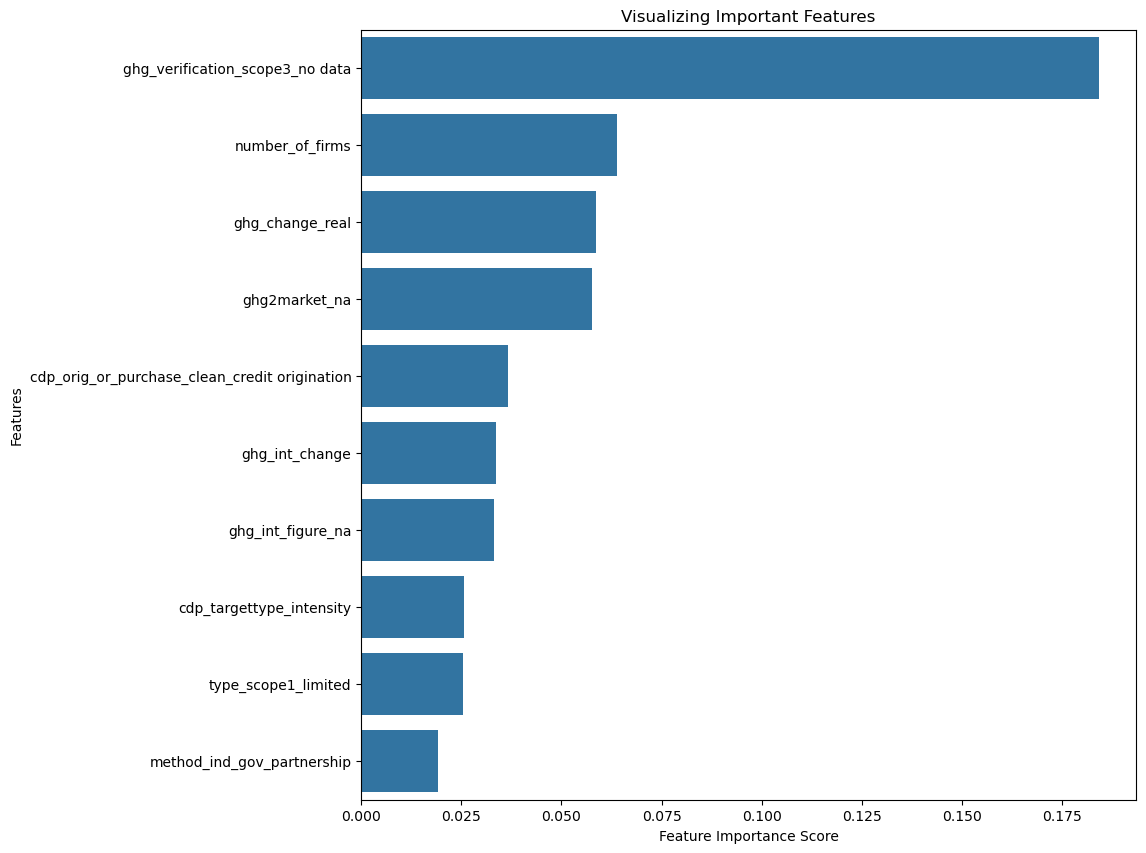

In [16]:
# feature importance plot of top 10 features of best estimator
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 10))
sns.barplot(x=feature_importances.importance[:10], y=feature_importances.index[:10])
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()



In [17]:
feature_importances.head(20)

,importance
ghg_verification_scope3_no data,0.184253
number_of_firms,0.063767
ghg_change_real,0.058576
ghg2market_na,0.057583
cdp_orig_or_purchase_clean_credit origination,0.036599
ghg_int_change,0.033570
ghg_int_figure_na,0.033075
cdp_targettype_intensity,0.025588
type_scope1_limited,0.025520
method_ind_gov_partnership,0.019224


**Random Forest with Cross Validation**

In [18]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=3)

# random forest with cross validation and gridCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
parameters = {'n_estimators': [50, 100, 200, 300, 400, 500],
              'max_depth': [None, 2, 5, 10, 20, 50, 100, 200]}
scoring = {'mse': make_scorer(mean_squared_error),
              'mae': make_scorer(mean_absolute_error),
              'r2': make_scorer(r2_score)}

# grid search with time series cross validation
grid_search = GridSearchCV(rf, parameters, cv=tscv, scoring=scoring, refit='mse', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
grid_search.best_params_
grid_search.best_score_
grid_search.best_estimator_
grid_search.cv_results_

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[CV] END ....................max_depth=None, n_estimators=50; total time=   0.2s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.3s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.4s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.4s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.6s
[CV] END ...................max_depth=None, n_estimators=200; total time=   0.6s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.7s
[CV] END ...................max_depth=None, n_estimators=200; total time=   1.1s
[CV] END ...................max_depth=None, n_estimators=300; total time=   1.0s
[CV] END ...................max_depth=None, n_estimators=200; total time=   1.8s
[CV] END ...................max_depth=None, n_estimators=400; total time=   1.4s
[CV] END ...................max_depth=None, n_estimators=300; total time=   1.9s
[CV] END ...................

{'mean_fit_time': array([0.3043383 , 0.54516935, 1.15127261, 1.81100074, 2.39639163,
        3.14722967, 0.17976491, 0.28910009, 0.61195302, 1.00085163,
        1.41304692, 1.78925649, 0.31620057, 0.54431001, 1.10859235,
        1.91044029, 2.27545675, 2.83293192, 0.37065601, 0.65253639,
        1.1991477 , 1.90771198, 2.75382455, 3.3529648 , 0.29047195,
        0.77337297, 1.62208271, 2.21855704, 2.88135266, 3.63770906,
        0.35989523, 0.83693298, 1.49791074, 2.30715068, 2.92643332,
        3.49346407, 0.3945063 , 0.79638465, 1.36719632, 2.00722313,
        2.63032921, 3.41271504, 0.29879053, 0.83689467, 1.50716559,
        1.96711707, 2.57808836, 2.8314987 ]),
 'std_fit_time': array([0.09214822, 0.15246759, 0.49474678, 0.63858329, 0.81993288,
        1.30007808, 0.04192391, 0.05063228, 0.13800087, 0.20864101,
        0.29821271, 0.28564336, 0.0298676 , 0.17478211, 0.34001918,
        0.59415806, 0.64796033, 0.67787783, 0.09752705, 0.27544276,
        0.4392774 , 0.74016938, 1.083

In [19]:
# best estimator
rf = grid_search.best_estimator_
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Random Forest')
print('MSE: ', mean_squared_error(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))

Random Forest
MSE:  2.219775229811759
MAE:  1.0413574004186616
R2:  0.27750008415956207


Can I put something to improve the model like in the case of the hospitality sector? such as number of airline passengers in the world or something like that? Industry14 Hospitality is not decarbonizing fast enough.

In [20]:
X_test['industry14_Hospitality']

10     0.0
21     0.0
32     0.0
43     1.0
54     0.0
65     0.0
76     0.0
96     0.0
107    0.0
118    0.0
129    0.0
Name: industry14_Hospitality, dtype: float64

In [21]:
# print feature importances don't plot just print
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances.head(20)

,importance
ghg_verification_scope3_no data,0.404028
ghg_int_change,0.074824
number_of_firms,0.056336
type_scope1_limited,0.051845
ghg2market_na,0.047882
ghg_int_figure_na,0.041544
ghg_change_real,0.039400
cdp_orig_or_purchase_clean_credit origination,0.026702
cdp_targettype_intensity,0.024947
cdp_lowcarbon_rev_total_missing,0.023221


**Lasso Regression**

In [22]:
# standardize train and test data for lasso
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
# lasso with cross validation
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import TimeSeriesSplit
n_alphas = 20
tscv = TimeSeriesSplit(n_splits=5)
lasso = LassoCV(cv = tscv , alphas = np.logspace(-6, 3, n_alphas), max_iter=100000, n_jobs=-1).fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)
print('Lasso')
print('MSE: ', mean_squared_error(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))
print('Alpha: ', lasso.alpha_)

/Users/fabrizioserafini/anaconda3/envs/thesis_project/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.223e-02, tolerance: 1.908e-02
  model = cd_fast.enet_coordinate_descent(
/Users/fabrizioserafini/anaconda3/envs/thesis_project/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.077e-02, tolerance: 1.908e-02
  model = cd_fast.enet_coordinate_descent(
/Users/fabrizioserafini/anaconda3/envs/thesis_project/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the numbe

Lasso
MSE:  1.8635163353639996
MAE:  1.041270868784017
R2:  0.3934564286574421
Alpha:  0.1623776739188721


In [24]:
# print coefficients and names side by side
lasso_coef = pd.DataFrame(lasso.coef_, index=X_train.columns, columns=['coef'])

# number of zero coefficients
np.sum(lasso_coef['coef'] == 0)

# print nonzero coefficients
lasso_coef[lasso_coef['coef'] != 0].sort_values(by='coef', ascending=False)

,coef
ghg_change_real,0.252907
cdp_risk_transition,0.201894
method_ind_MACC,0.161176
ghg_change_othergroup,0.091558
ghg1,0.046181
ghg_verification_scope3_no data,0.038942
ghg_change_measure,0.001863
scope2,-0.006093
number_of_firms,-0.017181
scope3,-0.052542


**Gradient Boosting**

In [25]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=200, max_depth=None, random_state=0)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)

# Performance metrics
print('XGBoost')
print('MSE: ', mean_squared_error(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))

XGBoost
MSE:  1.8826130923068478
MAE:  1.0093520968895524
R2:  0.38724075190840335


In [26]:
# suppress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
}

# Initialize the XGBRegressor
xgb_model = xgb.XGBRegressor(random_state=0)

# Initialize TimeSeriesSplit
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=0, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
                         'learning_rate': [0.01, 0.1, 0.2, 0.3],
                         'max_depth': [3, 6, 9],
                         'n_estimators': [50, 100, 200, 300],
                         'subsample': [0.7, 0.8, 0.9]},
             scoring='neg_mean_squared_error')

In [27]:
# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)

# Predictions with the best estimator
best_estimator = grid_search.best_estimator_
y_pred = best_estimator.predict(X_test)

# Performance metrics
print('XGBoost - Tuned Model')
print('MSE: ', mean_squared_error(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))


Best parameters found:  {'colsample_bytree': 0.6, 'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.9}
Best score found:  -1.3071589236781278
XGBoost - Tuned Model
MSE:  0.6897514657960422
MAE:  0.7307087763871536
R2:  0.775497370501463


In [28]:
# print predictions and actual values alongside
y_pred = pd.DataFrame(y_pred, columns=['pred'])
y_test = pd.DataFrame(y_test).reset_index(drop=True)
y_prev = data.loc[data['year'] == 2020]['ghg_change_real']
y_pred = pd.concat([y_pred, y_test, y_prev], axis=1)

y_pred

,pred,ghg_change_real_next,ghg_change_real
0,-5.222753,-6.028190,NaN
1,-5.430257,-4.662287,NaN
2,-4.130916,-3.019181,NaN
3,-1.928956,-0.493971,NaN
4,-5.433280,-4.962485,NaN
5,-5.112803,-4.803082,NaN
6,-4.363753,-4.002030,NaN
7,-4.699540,-4.015243,NaN
8,-6.288977,-5.820095,NaN
9,-7.001877,-7.264714,-6.428557


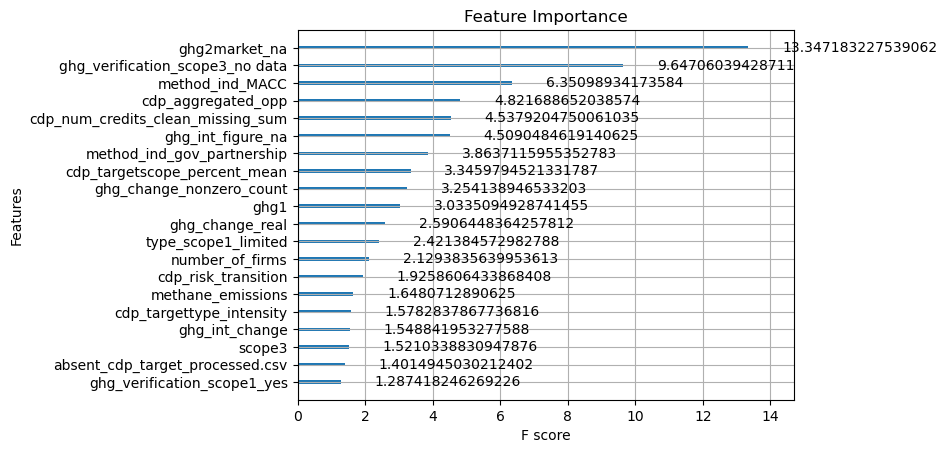

In [29]:

xgb.plot_importance(best_estimator, importance_type='gain', max_num_features=20, title='Feature Importance', xlabel='F score', ylabel='Features')
plt.show()

In [30]:
print('MSE: ', mean_squared_error(y_test, X_test['ghg_change_real']))
print('MAE: ', mean_absolute_error(y_test, X_test['ghg_change_real']))
print('R2: ', r2_score(y_test, X_test['ghg_change_real']))

MSE:  0.5428204007456372
MAE:  0.6272757209502811
R2:  0.823320988274811


In [31]:
# 2021 to 2022
r2_score(y_test['ghg_change_real_next'], X_test['ghg_change_real'])

0.823320988274811